In [7]:
import numpy as np
import csv
import math
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.impute import KNNImputer


''' 
def imputacao_dados():
    #10 parece ser um valor razoavel para o tamanho da base, hmmmmm, talvez para tensao em E0 tenhamos que mudar algo?
    
    for estado in [E0, E1, E2]:
        for tipo in [CORRENTE, TENSAO]:
            
            dataExperimentList[estado][tipo] = imputer.fit_transform(dataExperimentList[estado][tipo])
            if pd.isna(dataExperimentList[estado][tipo]):print("Não deu certo,  ainda ha NaN")

print(dataExperimentList[E0][7][CORRENTE][4:7])
'''
#import openpyxl

#Constantes

E0 = 0
E1 = 1
E2 = 2


CORRENTE = 0
TENSAO = 1

#CARREGANDO OS DADOS EM DATAFRAMES
def start():
    leitor = csv.reader(open("docs/MotorUniversal_2k_5kHz_SemNorm.xlsx - TesteMotorUniversalAgoraVai2000.csv","r"),delimiter=",")
    dados = list(leitor)
    dados.pop(0)
    for elemento in dados:
        for i in range(len(elemento)):
            if elemento[i]=='': elemento[i] ='NaN'

    #acess data be like data[E0][1][CORRENTE]
    #dataExperimentList  : list[list[pd.DataFrame]]

    dataExperimentList: list[list[np.ndarray]]
    dataExperimentList = [[],[],[]]
    ''' 
    for experimento in dados:
        #exp = {'corrente':experimento[1:1001],'tensao':experimento[1001:2001]}
        df = pd.DataFrame()
        df.replace(",",".")
        #df['corrente'] = pd.to_numeric(df['corrente'], errors='coerce')
        #df['tensao'] = pd.to_numeric(df['tensao'], errors='coerce')
        df['corrente'] = pd.to_numeric([numero.replace(",",".") for numero in experimento[1:1001]], errors='coerce')
        df['tensao'] = pd.to_numeric([numero.replace(",",".") for numero in experimento[1001:2001]], errors='coerce')
        dataExperimentList[int(experimento[0])].append(df)
    '''
    #imputer = KNNImputer(n_neighbors=10)
    for experimento in dados:

        df = pd.DataFrame()
        df.replace(",",".")
        #df['corrente'] = pd.to_numeric(df['corrente'], errors='coerce')
        #df['tensao'] = pd.to_numeric(df['tensao'], errors='coerce')
        df['corrente'] = pd.to_numeric([numero.replace(",",".") for numero in experimento[1:1001]], errors='coerce')
        df['tensao'] = pd.to_numeric([numero.replace(",",".") for numero in experimento[1001:2001]], errors='coerce')
        df['corrente'].fillna(df['corrente'].mean(), inplace=True)
        df['tensao'].fillna(df['tensao'].mean(), inplace=True)
        #dataExperimentList[int(experimento[0])].append(df)

        d1 = df["corrente"].to_numpy()
        #print(d1)
        d2 = df["tensao"].to_numpy()
        #print(d2)


        dataExperimentList[int(experimento[0])].append([d1,d2])
    return dataExperimentList

d0 = start()

#print(d0[E0])

In [8]:
#TESTE (Nao deve haver um NAN nesse segmento, caso contrario voltar)
d0[E0][7][CORRENTE][4:7]

array([0.683641  , 0.67699171, 0.675341  ])

In [9]:
#Forma dos dados
#retorna grupos de 10 experimentos aleatorios
#import matplotlib
#matplotlib.rcParams.update(matplotlib.rcParamsDefault)

def amostras(dataExperimentList, estado, quantidade):
    p = [random.randint(0,len(dataExperimentList[estado])) for i in range(quantidade)]
    print(p)
    return p

def tres_porquinhos(dataExperimentList):
    d = dataExperimentList
    t0 = random.randint(0,len(dataExperimentList[E0]))
    t1 = random.randint(0,len(dataExperimentList[E1]))
    t2 = random.randint(0,len(dataExperimentList[E2]))
    return [[d[E0][t0][CORRENTE],d[E1][t1][CORRENTE], d[E2][t2][CORRENTE]],
            [d[E0][t0][TENSAO], d[E1][t1][TENSAO], d[E2][t2][TENSAO]]]
    

def agrupamento(dataExperimentList,estado:int, amostras:list):
    p1 = [dataExperimentList[estado][amostras[i]][CORRENTE] for i in range(len(amostras))]
    p2 = [dataExperimentList[estado][amostras[i]][TENSAO] for i in range(len(amostras))]
    return [p1,p2]


def inverte_z(dados:np.ndarray, z_value):
    valor = z_value*np.std(dados) + np.mean(dados)
    return valor


def analise(grupo, percentis=False, p_values=(1,99), scatter=False):
    teste1 = grupo
    nro = len(teste1[0])
    fig, axs = plt.subplots(2,nro+1, figsize=(20,10))
    #fig.suptitle('Scatterplots de amostras randomicas')
    for i in range(nro):
        t1 = teste1[CORRENTE][i]
        t2 = teste1[TENSAO][i]

        if scatter==False:
            axs[0][i].plot([j for j in range(len(t1))],t1)
            axs[0][i].plot([j for j in range(len(t1))], [np.mean(t1)]*len(t1), color = 'red')
            
            

            axs[1][i].plot([j for j in range(len(t2))],t2)
            axs[1][i].plot([j for j in range(len(t2))], [np.mean(t2)]*len(t2), color = 'red')
        else:
            axs[0][i].scatter([j for j in range(len(t1))],t1, s=5)
            axs[0][i].plot([j for j in range(len(t1))], [np.mean(t1)]*len(t1), color = 'red')
            

            axs[1][i].scatter([j for j in range(len(t2))],t2, s=5)
            axs[1][i].plot([j for j in range(len(t2))], [np.mean(t2)]*len(t2), color = 'red')

        if percentis == True:
            inferior = inverte_z(t1,-4.0)
            superior = inverte_z(t2,4.0)
            axs[0][i].plot([j for j in range(len(t1))], [np.percentile(t1,p_values[0])]*len(t1), color = 'green')
            axs[0][i].plot([j for j in range(len(t1))], [np.percentile(t1,p_values[1])]*len(t1), color = 'green')
            #axs[0][i].plot([j for j in range(len(t1))], [inferior]*len(t1), color = 'yellow')
            #axs[0][i].plot([j for j in range(len(t1))], [superior]*len(t1), color = 'yellow')

            axs[1][i].plot([j for j in range(len(t2))], [np.percentile(t2,p_values[0])]*len(t1), color = 'green')
            axs[1][i].plot([j for j in range(len(t2))], [np.percentile(t2,p_values[1])]*len(t1), color = 'green')

            
    axs[0][0].set_title('Motor sem defeito')
    axs[0][1].set_title('Segmentos em curto')
    axs[0][2].set_title('Segmento quebrado')
    axs[0][3].set_title('Boxplots')
   


    axs[0][nro].boxplot(teste1[CORRENTE])
    axs[1][nro].boxplot(teste1[TENSAO])


    axs[0][0].set_xlabel('Medição')
    axs[0][0].set_ylabel('Corrente')


    axs[1][0].set_xlabel('Medição')
    axs[1][0].set_ylabel('Tensão')

    plt.show()



In [10]:
#NAO ALTERE AS AMOSTRAS, ELAS GARANTEM QUE OS MESMOS DADOS ESCOLHIDOS ANTES DO TRATAMENTO SEJAM USADOS DEPOIS
amostra_0 = amostras(d0,E0,3)
amostra_1 = amostras(d0,E1,3)
amostra_2 = amostras(d0,E2,3)

grupo_simples = tres_porquinhos(d0)

#ATUALIZE OS GRUPOS PARA DEMONSTRAR AS ALTERACOES FEITAS
grupo_0 = agrupamento(d0,E0, amostra_0)
grupo_1 = agrupamento(d0,E1, amostra_1)
grupo_2 = agrupamento(d0,E2, amostra_2)




[115, 187, 76]
[44, 3, 86]
[55, 55, 37]


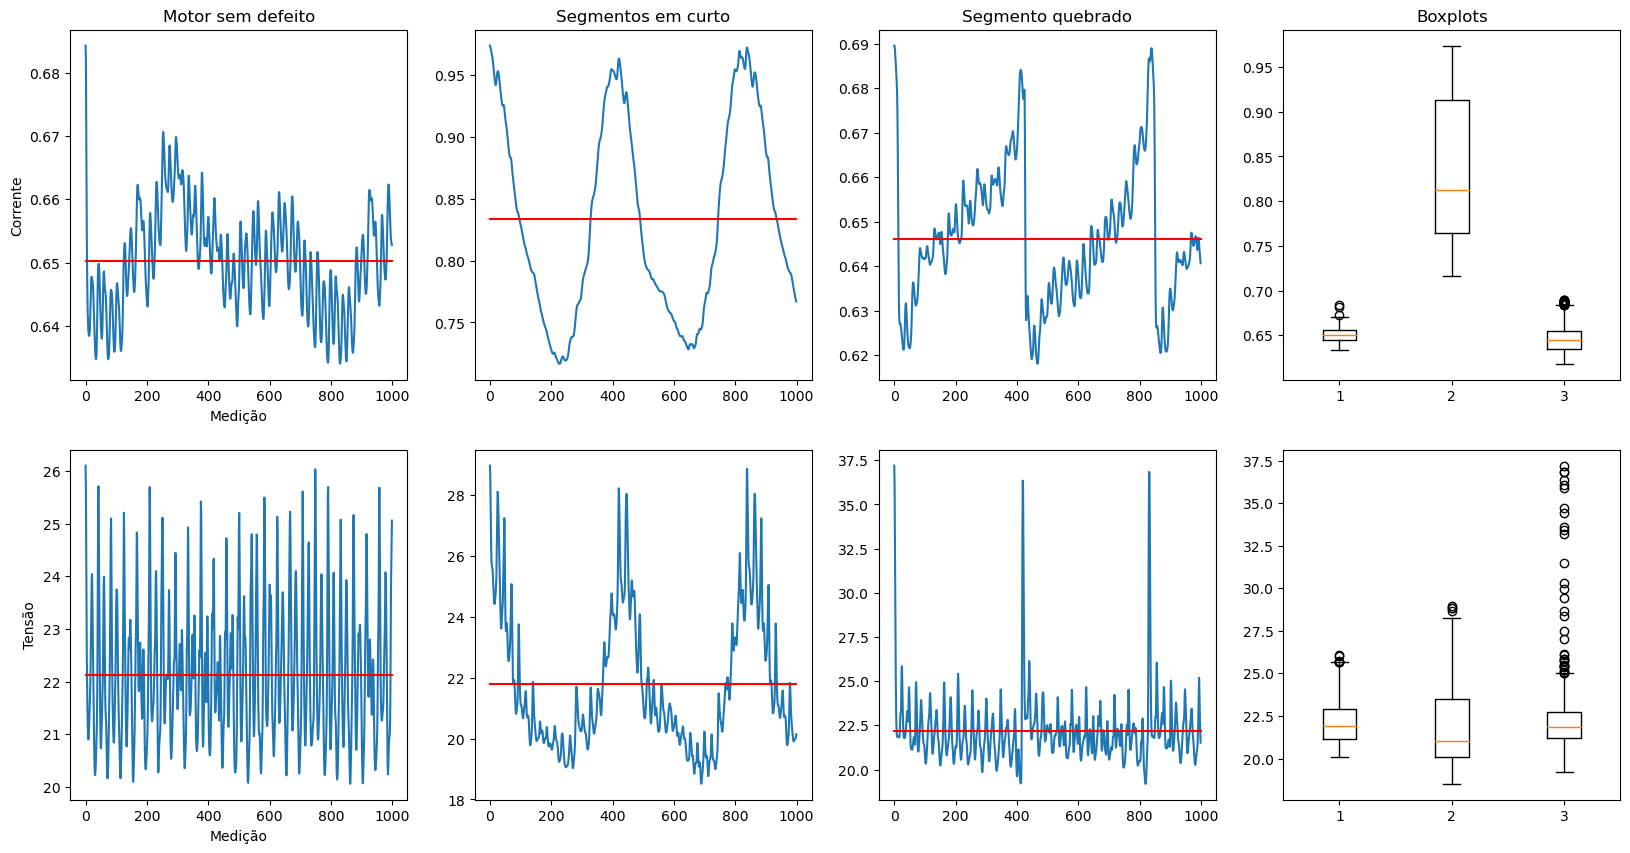

In [11]:
analise(grupo_simples)
#analise(grupo_0, percentis=True, )
#analise(grupo_1)
#analise(grupo_2)

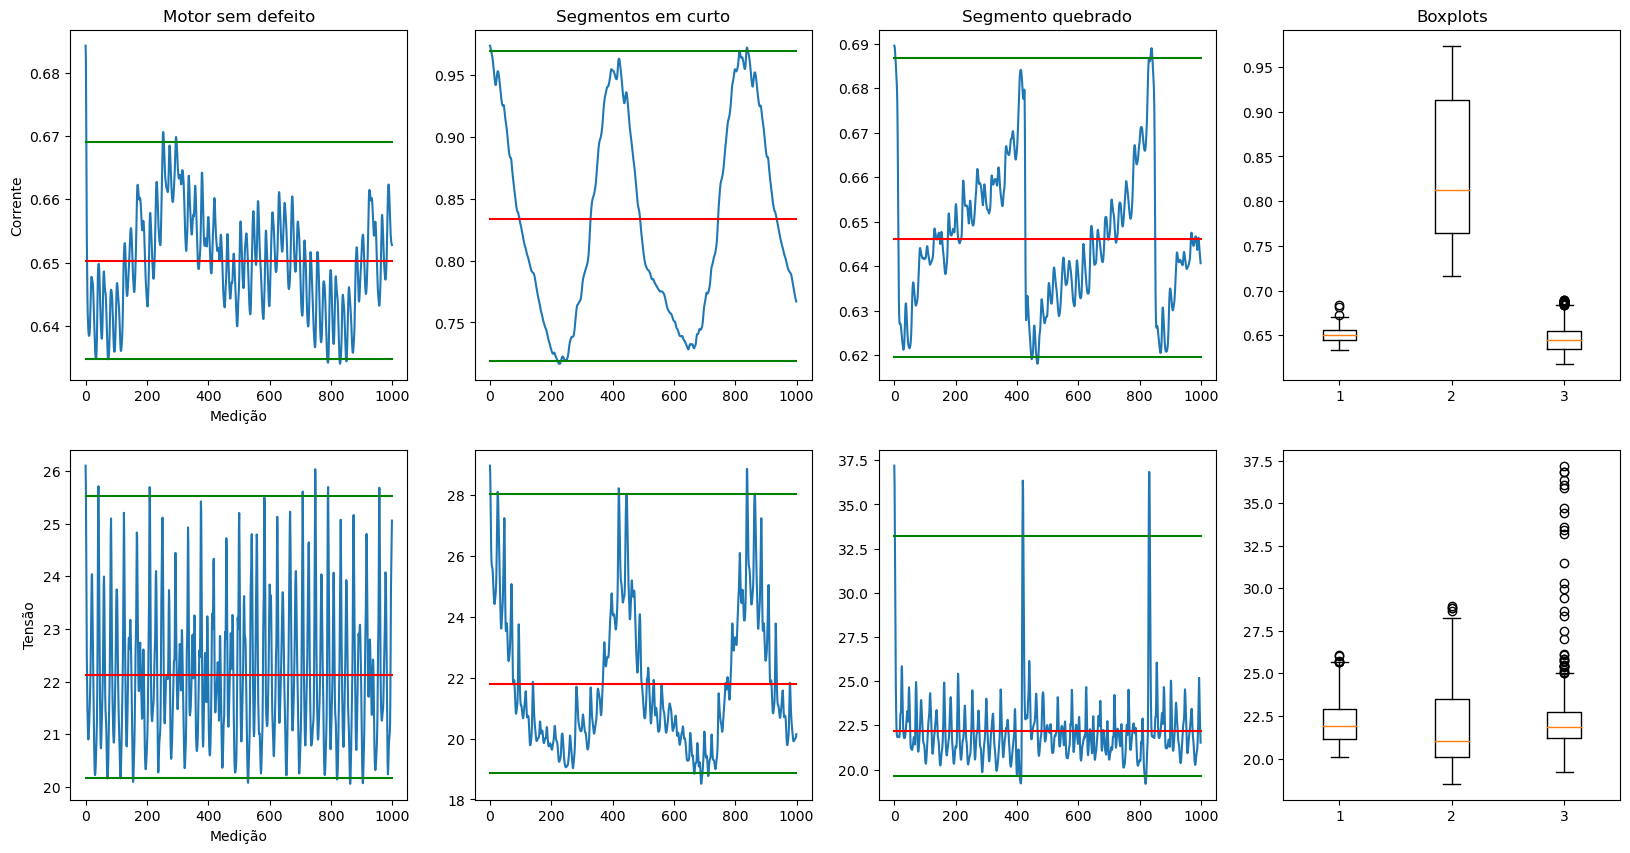

In [12]:
analise(grupo_simples,percentis=True, p_values=(1,99))

In [14]:
analise(d0,E0, grupo_0, percentis=True, p_values=(1,99))
analise(d0,E1, grupo_1, percentis=True, p_values=(1,99))
analise(d0,E2, grupo_2, percentis=True, p_values=(1,99))

TypeError: analise() got multiple values for argument 'percentis'

In [15]:
#FUNCAO PARA IMPUTACAO DOS OUTLIERS
from scipy import stats
from sklearn.preprocessing import MinMaxScaler


dataProperlyHandled: list[list[np.ndarray]]

def min_max(data:np.ndarray)->np.ndarray:
    return (data-np.min(data))/(np.max(data)-np.min(data))



def cap_outliers(dataExperimentList, l_inferior, l_superior):
    dados= [[],[],[]]
    for estado in [E0,E1,E2]:

        for i in range(len(dataExperimentList[estado])):
            d1 = dataExperimentList[estado][i][CORRENTE]
            d2 = dataExperimentList[estado][i][TENSAO]

            
            devio1 = np.std(d1)
            media1 = np.mean(d1)
            minimo1 = l_inferior*devio1 + media1
            maximo1 = l_superior*devio1 + media1

            devio2 = np.std(d2)
            media2 = np.mean(d2)
            minimo2 = l_inferior*devio2 + media2
            maximo2 = l_superior*devio2 + media2
            

            z1 = stats.mstats.zscore(d1)
            z2 = stats.mstats.zscore(d2)
        
            d1_1th_p = np.percentile(d1, 1)
            d1_2th_p = np.percentile(d1,2)
            d1_98th_p = np.percentile(d1,95)
            d1_99th_p = np.percentile(d1,99)
            
            
            d2_1th_p = np.percentile(d2, 1)
            d2_2th_p = np.percentile(d2,2)
            d2_98th_p = np.percentile(d2,95)
            d2_99th_p = np.percentile(d2, 99)

            for j in range(len(d1)):
                if z1[j] < l_inferior: d1[j] = random.uniform(d1_1th_p,d1_2th_p)
                elif z1[j] > l_superior: d1[j] = random.uniform(d1_98th_p, d1_99th_p)
            for j in range(len(d2)):
                if z2[j] < l_inferior: d2[j] = random.uniform(d2_1th_p,d2_2th_p)
                elif z2[j] > l_superior and estado !=E2: d2[j] = random.uniform(d2_98th_p, d2_99th_p)
            #^^^^^^ NAO FORAM REMOVIDOS OS OUTLIERS DE DA TENSAO DO ESTADO E2 SO PARA VERIFICAR COMPORTAMENTO
            
            dados[estado].append([ min_max(d1), min_max(d2),estado])

    return dados


def analise_com_outliers(dataExperimentList,estado:int,grupo, percentis=False, p_values=(1,99)):
    teste1 = grupo
    nro = len(teste1[0])
    fig, axs = plt.subplots(2,nro+1, figsize=(15,10))
    fig.suptitle('Scatterplots de amostras randomicas')
    for i in range(nro):
        t1 = teste1[CORRENTE][i]
        t2 = teste1[TENSAO][i]


        z1 = stats.mstats.zscore(t1)
        t1_valores = []
        t1_outliers = []

        t2_valores = []
        t2_outliers = []
        z2 = stats.mstats.zscore(t2)

        for i in range(t1):
            (t1_valores, t1_outliers)[abs(z1[i])>3.0].append(t1[i])

        for i in range(t2):
            (t2_valores, t2_outliers)[abs(z2[i])>3.0].append(t2[i])


        axs[0][i].scatter([j for j in range(len(t1_valores))],t1_valores, s=3)
        axs[0][i].scatter([j for j in range(len(t1_outliers))],t1_outliers, color='pink' ,s=3)

        axs[0][i].plot([j for j in range(len(t1))], [np.mean(t1)]*len(t1), color = 'red')
        

        axs[1][i].scatter([j for j in range(len(t2))],t2, s=3)
        axs[1][i].plot([j for j in range(len(t2))], [np.mean(t2)]*len(t2), color = 'red')

        if percentis == True:
            inferior = inverte_z(t1,-4.0)
            superior = inverte_z(t2,4.0)
            axs[0][i].plot([j for j in range(len(t1))], [np.percentile(t1,p_values[0])]*len(t1), color = 'green')
            axs[0][i].plot([j for j in range(len(t1))], [np.percentile(t1,p_values[1])]*len(t1), color = 'green')
            #axs[0][i].plot([j for j in range(len(t1))], [inferior]*len(t1), color = 'yellow')
            #axs[0][i].plot([j for j in range(len(t1))], [superior]*len(t1), color = 'yellow')

            axs[1][i].plot([j for j in range(len(t2))], [np.percentile(t2,p_values[0])]*len(t1), color = 'green')
            axs[1][i].plot([j for j in range(len(t2))], [np.percentile(t2,p_values[1])]*len(t1), color = 'green')

            
    
    axs[0][nro].boxplot(teste1[CORRENTE])
    axs[1][nro].boxplot(teste1[TENSAO])


    axs[0][0].set_xlabel('teste')
    axs[0][0].set_ylabel('corrente')


    axs[1][0].set_xlabel('teste')
    axs[1][0].set_ylabel('tensao')

    plt.show()



In [16]:
dados_separados = cap_outliers(d0,-3.0,3.0)

In [17]:
grupo_0 = agrupamento(d0,E0, amostra_0)
grupo_1 = agrupamento(d0,E1, amostra_1)
grupo_2 = agrupamento(d0,E2, amostra_2)

analise(d0,E0,grupo_0)
analise(d0,E1,grupo_1)
analise(d0,E2,grupo_2)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001F76CDA1F70> (for post_execute):


KeyboardInterrupt: 

In [18]:
#IA FINALMENTE IAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
from sklearn.model_selection import train_test_split
import random

#Separação dos dados para o experimento

#temos dados separados um dicionario por estado, já preparados para a imputacao
'''
xdados_bloco, xdados_teste, xlabel_bloco, xlabel_teste = train_test_split(dados_separados[E0][0],dados_separados[E0][1],test_size=0.30)
xdados_treino, xdados_validacao, xlabel_treino, xlabel_validacao = train_test_split(xdados_bloco,xlabel_bloco,test_size=0.10)

for estado in [E1,E2]:
    auxxdados_bloco, auxxdados_teste, auxxlabel_bloco, auxxlabel_teste = train_test_split(dados_separados[estado][0],dados_separados[estado][1],test_size=0.30)
    auxxdados_treino, auxxdados_validacao, auxxlabel_treino, auxxlabel_validacao = train_test_split(auxxdados_bloco,auxxlabel_bloco,test_size=0.10)

    print('antes',xdados_teste.shape, 'shape dos auxdados',auxxdados_teste.shape)
    xdados_teste = np.append(xdados_teste, auxxdados_teste, axis=0)
    xlabel_teste = np.append(xlabel_teste, auxxlabel_teste, axis=0)
    print('depois',xdados_teste.shape)
    
    xdados_treino = np.append(xdados_treino, auxxdados_treino, axis=0)
    xlabel_treino = np.append(xlabel_treino, auxxlabel_treino, axis=0)

    xdados_validacao = np.append(xdados_validacao, auxxdados_validacao, axis=0)
    xlabel_validacao = np.append(xlabel_validacao, auxxlabel_validacao, axis=0)
'''
print(len(dados_separados[E0]))

densexdados_bloco, densexdados_teste = train_test_split(dados_separados[E0],test_size=0.30)
densexdados_treino, densexdados_validacao = train_test_split(densexdados_bloco, test_size=0.10)

for estado in [E1,E2]:
    auxxdados_bloco, auxxdados_teste = train_test_split(dados_separados[estado],test_size=0.30)
    auxxdados_treino, auxxdados_validacao = train_test_split(auxxdados_bloco,test_size=0.10)

    print('antes',len(densexdados_teste), 'dados a somar',len(auxxdados_teste))
    #print(auxxdados_teste)
    densexdados_teste += auxxdados_teste
    #densexdados_teste = np.random.shuffle(densexdados_teste)
    print('depois',len(densexdados_teste))
    
    densexdados_treino += auxxdados_treino

    densexdados_validacao += auxxdados_validacao
    #densexdados_validacao = np.random.shuffle(densexdados_validacao)

random.shuffle(densexdados_teste)
random.shuffle(densexdados_treino)
random.shuffle(densexdados_validacao)
print(len(densexdados_teste[0]))


xdados_teste, xlabel_teste = np.array([[elemento[0],elemento[1]] for elemento in densexdados_teste]), np.array([elemento[2] for elemento in densexdados_teste])

xdados_treino, xlabel_treino = np.array([[elemento[0],elemento[1]] for elemento in densexdados_treino]), np.array([elemento[2] for elemento in densexdados_treino])

xdados_validacao, xlabel_validacao = np.array([[elemento[0],elemento[1]] for elemento in densexdados_validacao]), np.array([elemento[2] for elemento in densexdados_validacao])



300
antes 90 dados a somar 30
depois 120
antes 120 dados a somar 30
depois 150
3


treino: (315, 2, 1000)
teste: (150, 2, 1000)
validacao: (35, 2, 1000)


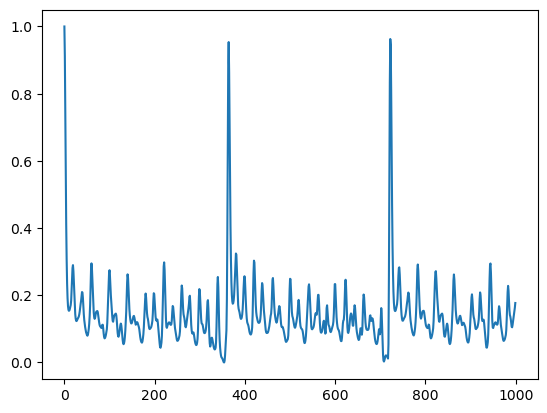

In [19]:
print('treino:', xdados_treino.shape)
print('teste:',xdados_teste.shape)
print('validacao:',xdados_validacao.shape)
plt.plot(xdados_teste[5][TENSAO])

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

print(xdados_treino.shape)
epocas = 10

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(2,1000)),
    keras.layers.Dense(1000,activation = "relu"),
    keras.layers.Dense(3,activation = "sigmoid")
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

teste = model.fit(xdados_treino,
                xlabel_treino,
                validation_data=(xdados_validacao, xlabel_validacao),
                epochs=epocas)
print('TESTE')
model.evaluate(xdados_teste, xlabel_teste)


(315, 2, 1000)
Epoch 1/10
10/10 [==============================] - 1s 63ms/step - loss: 1.2876 - accuracy: 0.7333 - val_loss: 0.4262 - val_accuracy: 0.8000
Epoch 2/10
10/10 [==============================] - 0s 45ms/step - loss: 0.1486 - accuracy: 0.9333 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 0s 48ms/step - loss: 0.0295 - accuracy: 0.9937 - val_loss: 0.0146 - val_accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 1s 53ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 1s 52ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 0s 49ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 1s 51ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.000

[0.000860242173075676, 1.0]

In [29]:
predictions = model.predict(xdados_teste)
for i in range(10):
    print('label predito', predictions[i],'label esperado',xlabel_teste[i])


5/5 [==============================] - 0s 5ms/step
label predito [7.6472585e-04 9.9988991e-01 5.9616085e-02] label esperado 1
label predito [9.9997652e-01 3.2355185e-04 5.5134308e-01] label esperado 0
label predito [8.7042834e-04 9.9986506e-01 5.9413154e-02] label esperado 1
label predito [9.999698e-01 7.917241e-06 9.758565e-01] label esperado 0
label predito [7.3081511e-01 3.9832413e-04 9.9837226e-01] label esperado 2
label predito [0.3438614  0.00198884 0.9985547 ] label esperado 2
label predito [9.999990e-01 9.712845e-07 9.437173e-01] label esperado 0
label predito [9.999273e-01 8.712541e-05 8.961909e-01] label esperado 0
label predito [0.00111227 0.9999407  0.02824144] label esperado 1
label predito [9.9988055e-01 2.3097731e-04 8.3824533e-01] label esperado 0


[1.2876473665237427, 0.14862114191055298, 0.029512478038668633, 0.008413482457399368, 0.003646926721557975, 0.0025246127042919397, 0.0014501084806397557, 0.0012039626017212868, 0.0012188139371573925, 0.0011054802453145385]


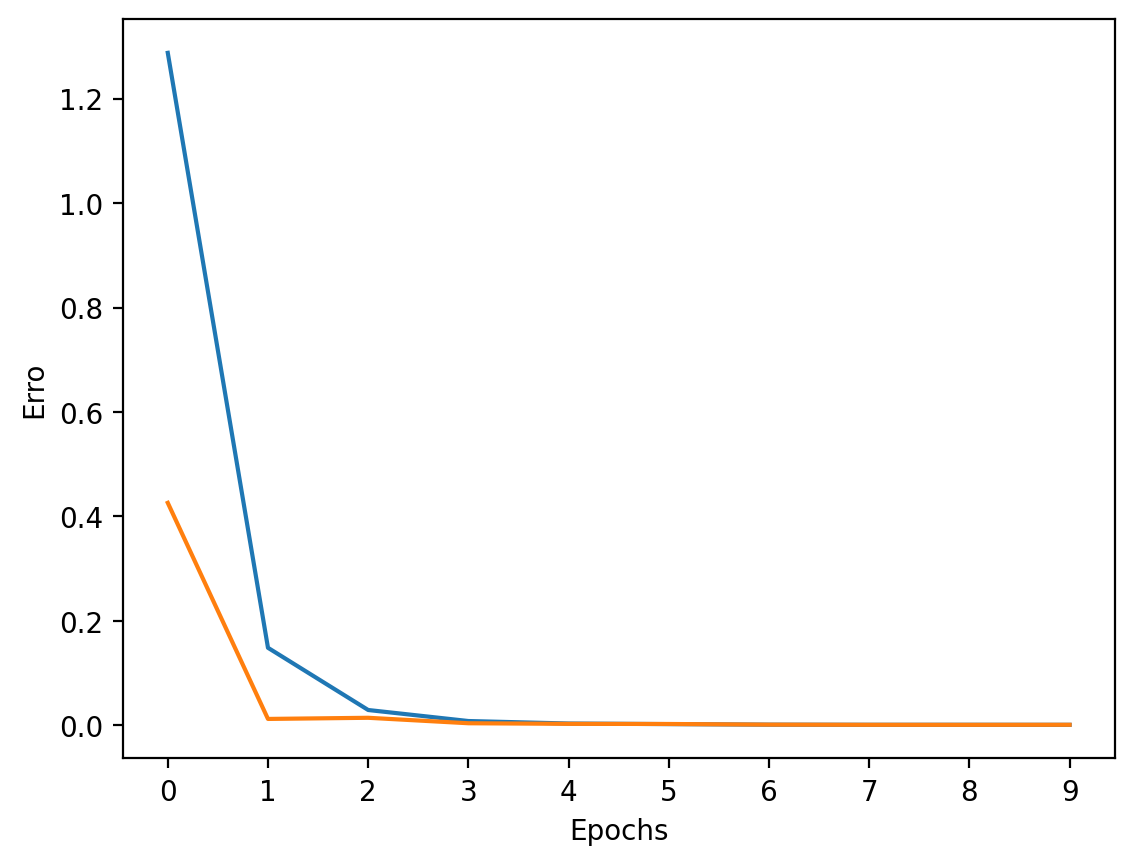

In [30]:

print(teste.history['loss'])

plt.figure(dpi=200)
plt.plot(teste.history['loss'])
plt.plot(teste.history['val_loss'])

plt.xlabel('Epochs')
plt.ylabel('Erro')

plt.xticks(range(epocas))

plt.show()